In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import contextily as ctx
import os

In [275]:
df = pd.DataFrame()

for filename in os.listdir("redfin"):
    if filename.endswith(".csv"):
        df2 = pd.read_csv("redfin/{}".format(filename))
        df = df.append(df2)
        
df = df.reset_index()

In [104]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [111]:
corr = df[["DAYS ON MARKET","SQUARE FEET","PRICE","BEDS","BATHS","LOT SIZE"]].corr()
corr.style.background_gradient(cmap='Spectral')

,DAYS ON MARKET,SQUARE FEET,PRICE,BEDS,BATHS,LOT SIZE
DAYS ON MARKET,1,-0.0675181,-0.0635487,-0.0140356,-0.0375434,-0.00914511
SQUARE FEET,-0.0675181,1,0.413059,0.659682,0.544684,-0.00274962
PRICE,-0.0635487,0.413059,1,0.488612,0.283674,-0.00105058
BEDS,-0.0140356,0.659682,0.488612,1,0.508306,0.00094155
BATHS,-0.0375434,0.544684,0.283674,0.508306,1,-0.000494059
LOT SIZE,-0.00914511,-0.00274962,-0.00105058,0.00094155,-0.000494059,1


In [118]:
corr = df[df["PROPERTY TYPE"]=="Single Family Residential"][["DAYS ON MARKET","SQUARE FEET","PRICE","BEDS","BATHS","LOT SIZE"]].corr()
corr.style.background_gradient(cmap='Spectral')

,DAYS ON MARKET,SQUARE FEET,PRICE,BEDS,BATHS,LOT SIZE
DAYS ON MARKET,1,-0.0871536,-0.107452,-0.0827079,-0.00504787,-0.0282987
SQUARE FEET,-0.0871536,1,0.359479,0.395566,0.547626,-0.0262996
PRICE,-0.107452,0.359479,1,0.311298,0.183995,-0.0101659
BEDS,-0.0827079,0.395566,0.311298,1,0.399991,-0.0201217
BATHS,-0.00504787,0.547626,0.183995,0.399991,1,-0.00263217
LOT SIZE,-0.0282987,-0.0262996,-0.0101659,-0.0201217,-0.00263217,1


In [119]:
corr = df[df["PROPERTY TYPE"]=="Townhouse"][["DAYS ON MARKET","SQUARE FEET","PRICE","BEDS","BATHS","LOT SIZE"]].corr()
corr.style.background_gradient(cmap='Spectral')

,DAYS ON MARKET,SQUARE FEET,PRICE,BEDS,BATHS,LOT SIZE
DAYS ON MARKET,1,-0.077517,-0.029578,0.0541796,-0.131145,0.0292754
SQUARE FEET,-0.077517,1,0.191495,0.352479,0.213961,0.0263831
PRICE,-0.029578,0.191495,1,0.244261,0.217908,0.00703868
BEDS,0.0541796,0.352479,0.244261,1,0.499448,-0.0111279
BATHS,-0.131145,0.213961,0.217908,0.499448,1,-0.00742712
LOT SIZE,0.0292754,0.0263831,0.00703868,-0.0111279,-0.00742712,1


In [112]:
new = df.groupby("PROPERTY TYPE").agg(["median",'count'])[["DAYS ON MARKET"]].reset_index().rename(columns={"count": "sample size"})
new[new['DAYS ON MARKET']['sample size']>0]

PROPERTY TYPE DAYS ON MARKET            
                                     median sample size
0                Condo/Co-op          314.0          73
1    Multi-Family (2-4 Unit)          200.0           2
3  Single Family Residential          410.0         552
4                  Townhouse          437.0         825

In [113]:
new = df.groupby("ZIP OR POSTAL CODE").agg(["median",'count'])[["DAYS ON MARKET"]].reset_index().rename(columns={"count": "sample size"})
new[new['DAYS ON MARKET']['sample size']>0]

ZIP OR POSTAL CODE DAYS ON MARKET            
                              median sample size
0             20018.0          596.0         105
1             20019.0          652.5          88
2             20607.0          340.0          39
3             20613.0          606.0         129
5             20704.0         1034.0           2
6             20705.0          375.0          25
7             20706.0          477.0          93
8             20707.0          372.0          39
9             20720.0          385.0          47
10            20721.0          691.0          54
11            20722.0          378.0           7
12            20723.0          669.0         135
13            20735.0          333.0          53
14            20737.0          425.0          15
15            20743.0          193.0          15
16            20744.0          412.5          56
17            20745.0          256.0          65
18            20748.0          662.0           1
19            20769.0          583.0          12
20            20770.0          461.0          91
21            20771.0          307.0           1
22            20772.0          230.5         134
23            20774.0          196.0         111
24            20781.0          287.0          21
25            20782.0          386.0          81
26            20785.0          240.5          32
27            92011.0          152.0           1

In [114]:
new = df.groupby(["ZIP OR POSTAL CODE","PROPERTY TYPE"]).agg(["median","count"])[["DAYS ON MARKET"]].reset_index().sort_values(["ZIP OR POSTAL CODE","PROPERTY TYPE"]).rename(columns={"count": "sample size"})
new[new['DAYS ON MARKET']['sample size']>0]

ZIP OR POSTAL CODE              PROPERTY TYPE DAYS ON MARKET            
                                                         median sample size
0             20018.0                Condo/Co-op          745.5          18
1             20018.0  Single Family Residential          342.0           7
2             20018.0                  Townhouse          597.5          80
4             20019.0    Multi-Family (2-4 Unit)          200.0           2
5             20019.0  Single Family Residential          706.0          33
6             20019.0                  Townhouse          683.0          53
8             20607.0  Single Family Residential          354.0          36
9             20607.0                  Townhouse           53.0           3
11            20613.0  Single Family Residential          260.0          49
12            20613.0                  Townhouse          670.0          80
15            20704.0                  Townhouse         1034.0           2
16            20705.0  Single Family Residential           18.0           3
17            20705.0                  Townhouse          392.5          22
18            20706.0                Condo/Co-op          208.5           4
20            20706.0  Single Family Residential          725.5          14
21            20706.0                  Townhouse          434.0          75
24            20707.0  Single Family Residential          440.0           9
25            20707.0                  Townhouse          329.0          30
28            20720.0  Single Family Residential          368.0          43
29            20720.0                  Townhouse          531.5           4
32            20721.0  Single Family Residential          677.0          41
33            20721.0                  Townhouse          893.0          13
36            20722.0  Single Family Residential          378.0           7
37            20723.0                Condo/Co-op          795.5           6
39            20723.0  Single Family Residential          580.5          80
40            20723.0                  Townhouse          698.0          49
43            20735.0  Single Family Residential          333.0          53
45            20737.0  Single Family Residential          425.0           5
46            20737.0                  Townhouse          417.5          10
47            20743.0  Single Family Residential          410.0           7
48            20743.0                  Townhouse          161.5           8
50            20744.0  Single Family Residential          412.5          56
52            20745.0                Condo/Co-op          226.0          28
53            20745.0                  Townhouse          418.0          37
54            20748.0  Single Family Residential          662.0           1
55            20769.0                Condo/Co-op          230.0           1
56            20769.0  Single Family Residential          754.0           2
57            20769.0                  Townhouse          586.0           9
58            20770.0                Condo/Co-op          452.0           2
59            20770.0                  Townhouse          461.0          89
60            20771.0                  Townhouse          307.0           1
61            20772.0                Condo/Co-op          637.0           1
63            20772.0  Single Family Residential          293.0          52
64            20772.0                  Townhouse          196.0          81
67            20774.0  Single Family Residential          160.0          44
68            20774.0                  Townhouse          202.0          67
70            20781.0  Single Family Residential          865.5           2
71            20781.0                  Townhouse          235.0          19
72            20782.0                Condo/Co-op          508.5           6
74            20782.0  Single Family Residential          413.0           1
75            20782.0                  Townhouse   

In [157]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re

In [293]:
for n,row in df.iloc[2594:].iterrows():
    url = row["URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)"]
    print(n,url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    web_byte = urlopen(req).read()
    webpage = web_byte.decode('utf-8')
    soup = BeautifulSoup(webpage, 'html.parser')
    
    try:
        data = soup.find_all(text="Interior Features: ")[0].parent.find("span").text.split(",")
        for item in data:
            if item not in df:
                df.insert(2, item, None)
            df.loc[n, item] = True
    except:
        pass

2594 http://www.redfin.com/MD/Clinton/9514-Lormar-Ct-20735/home/17410899
2595 http://www.redfin.com/MD/Clinton/9501-Baymar-Ct-20735/home/17410901
2596 http://www.redfin.com/MD/Clinton/8713-Kittama-Dr-20735/home/11122342
2597 http://www.redfin.com/MD/Clinton/9505-Lormar-Ct-20735/home/17411007
2598 http://www.redfin.com/MD/Clinton/9512-Lormar-Ct-20735/home/17410900
2599 http://www.redfin.com/MD/Clinton/9600-Lormar-Ct-20735/home/17410897
2600 http://www.redfin.com/MD/Clinton/12801-Carolina-Meadow-Ln-20735/home/11754607
2601 http://www.redfin.com/MD/Clinton/9501-Lormar-Ct-20735/home/17410906
2602 http://www.redfin.com/MD/Clinton/6203-Hunt-Weber-Dr-20735/home/144224207
2603 http://www.redfin.com/MD/Clinton/6716-Craig-Ln-20735/home/17411002
2604 http://www.redfin.com/MD/Clinton/10608-Sir-Brendan-Ave-20735/home/12484222
2605 http://www.redfin.com/MD/Clinton/8715-Kittama-Dr-20735/home/11122201
2606 http://www.redfin.com/MD/Clinton/8405-Kittama-Dr-20735/home/11122327
2607 http://www.redfin.com/

In [294]:
# df.to_csv("pgc.csv")

In [438]:
item_df = pd.DataFrame(columns=["item","value"])

for item in df.columns[df.columns.get_loc(" Studio"):df.columns.get_loc("Kitchen - Island")].values:
    temp = pd.DataFrame([(item, df[df[item]==True]["index"].count())],columns=["item","value"]) 
    item_df = item_df.append(temp)
#     print(temp.loc[0])

In [439]:
item_df.sort_values("value", ascending=False)

,item,value
0,Master Bath(s),889
0,Upgraded Countertops,876
0,Floor Plan - Open,854
0,Wood Floors,708
0,Kitchen - Island,644
0,Dining Area,508
0,Recessed Lighting,476
0,Family Room Off Kitchen,410
0,Kitchen - Gourmet,401
0,Breakfast Area,383


In [385]:
df = pd.read_csv("pgc.csv")
df = df.fillna(False)
df = df[df["DAYS ON MARKET"]!=False]
df["DAYS ON MARKET"] = df["DAYS ON MARKET"].apply(lambda x: int(x))

In [449]:
new = df[df["DAYS ON MARKET"].notnull()].groupby(" Crown Moldings").agg(["median",'count'])[["DAYS ON MARKET"]].reset_index().rename(columns={"count": "sample size"})
new[new['DAYS ON MARKET']['sample size']>0]

Crown Moldings DAYS ON MARKET            
                          median sample size
0           False            410        1193
1            True            462         259

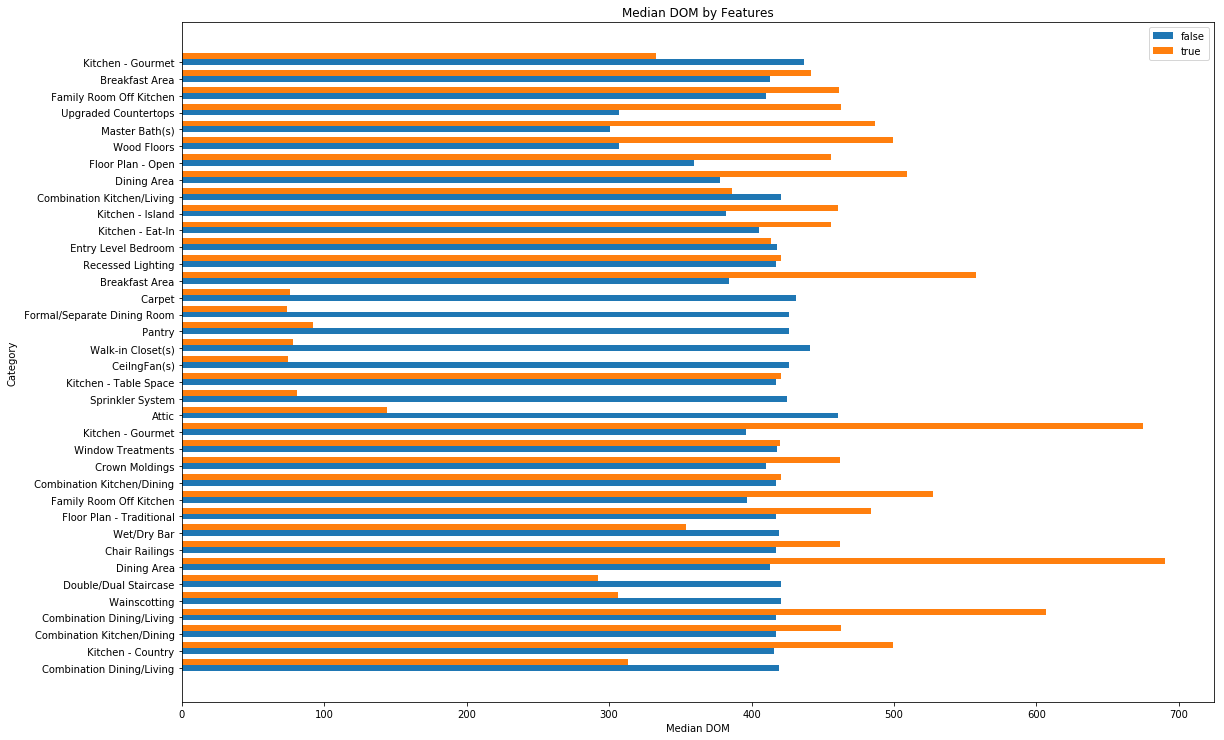

In [506]:
import matplotlib.pyplot as plt
import numpy as np

falses = [] 
trues = []
labels = []
samples = []

for key, value in item_df.iterrows():
    if value["value"]>=25:
        labels.append(value["item"])
        new = df[df["DAYS ON MARKET"].notnull()].groupby(value["item"]).agg(["median",'count'])[["DAYS ON MARKET"]].reset_index().rename(columns={"count": "sample size"})
#         print(new[new['DAYS ON MARKET']['sample size']>0])
        falses.append(new[new['DAYS ON MARKET']['sample size']>0]['DAYS ON MARKET']["median"][0])
        trues.append(new[new['DAYS ON MARKET']['sample size']>0]['DAYS ON MARKET']["median"][1])
        samples.append(new[new['DAYS ON MARKET']['sample size']>0]['DAYS ON MARKET']["sample size"].sum())

index = np.arange(len(trues))
bar_width = 0.35

fig, ax = plt.subplots()

false = ax.barh(index, falses, bar_width, label="false")
true = ax.barh(index+bar_width, trues, bar_width, label="true")
# sample = ax.barh(index+(bar_width*2), samples, bar_width, label="sample size")

ax.set_ylabel('Category')
ax.set_xlabel('Median DOM')
ax.set_title('Median DOM by Features')
ax.set_yticks(index)
ax.set_yticklabels(labels)
# plt.yticks(rotation=90)
ax.legend()
fig.set_size_inches(18.5, 12.5)
fig.savefig('DOM.png', dpi=300)

plt.show()